# Build a FeedForward Neural Network

# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense

# Load Dataset

In [3]:
df1 = pd.read_csv("mnist_train.csv")

In [4]:
df1

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = df1.drop("label", axis=1)
Y_train = df1["label"]

In [6]:
df2 = pd.read_csv("mnist_test.csv")

In [7]:
df2

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_test = df2.drop("label",axis=1)
Y_test = df2["label"]

In [9]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [10]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [16]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

# Build Model

In [17]:
model = Sequential()

In [18]:
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [19]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"])

In [20]:
e = 11
H = model.fit(X_train,Y_train,validation_data=(X_train,Y_train), epochs=e, batch_size=128)

Epoch 1/11
469/469 [==============================] - 3s 5ms/step - loss: 2.3095 - accuracy: 0.1935 - val_loss: 2.2506 - val_accuracy: 0.3464
Epoch 2/11
469/469 [==============================] - 2s 5ms/step - loss: 2.2214 - accuracy: 0.3726 - val_loss: 2.1886 - val_accuracy: 0.4370
Epoch 3/11
469/469 [==============================] - 2s 4ms/step - loss: 2.1464 - accuracy: 0.5058 - val_loss: 2.0963 - val_accuracy: 0.5288
Epoch 4/11
469/469 [==============================] - 2s 4ms/step - loss: 2.0321 - accuracy: 0.5600 - val_loss: 1.9574 - val_accuracy: 0.6197
Epoch 5/11
469/469 [==============================] - 2s 4ms/step - loss: 1.8683 - accuracy: 0.6019 - val_loss: 1.7704 - val_accuracy: 0.6059
Epoch 6/11
469/469 [==============================] - 2s 4ms/step - loss: 1.6675 - accuracy: 0.6189 - val_loss: 1.5615 - val_accuracy: 0.6295
Epoch 7/11
469/469 [==============================] - 2s 4ms/step - loss: 1.4640 - accuracy: 0.6468 - val_loss: 1.3683 - val_accuracy: 0.6661
Epoch 

In [29]:
Y_pred = model.predict(X_test, batch_size=128)

79/79 [==============================] - 0s 2ms/step


In [30]:
Y_pred.shape

(10000, 10)

In [31]:
Y_test.shape

(10000, 10)

In [32]:
accuracy_score(Y_pred.argmax(axis=1), Y_test.argmax(axis=1))

0.8109

# Plot Loss and Accuracy

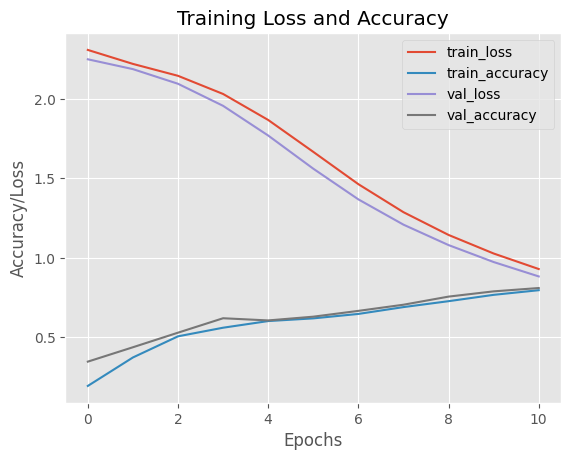

In [34]:
plt.style.use("ggplot")
plt.plot(np.arange(0,e), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,e), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0,e), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,e), H.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy/Loss")
plt.title("Training Loss and Accuracy")
plt.legend()